# Learning Synaptic Delays (LSD) is good for spiking neurons

## Create a structured pattern in noise

In [1]:
nb_syn, noise_density, simtime, t_true = 50, 1e-3, 1e3, .5e3
T = 100

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def norm(X):
    return (X-X.min())/(X.max()-X.min())

def vonmises(N_inputs, A, theta, k=2):
    return A*norm(np.exp(k*np.cos(2*np.pi*(np.linspace(0, 1, N_inputs)-theta))))

def cospattern(N_inputs, A, theta, k=4):
    return A*norm(np.cos(k*np.pi*(np.linspace(0, 1, N_inputs)-theta)))

def linear(N_inputs, A, theta):
    return np.linspace(0, A, N_inputs)

def make_input(nb_syn, noise_density, simtime, T, t_true, theta=0, function=cospattern, seed=None):
    np.random.seed(seed)
    # draw random gaussian noise spike timings -> shape (nb_syn, nb_ev_noise)
    N_noise = int(noise_density*simtime*nb_syn)
    adress_noise = np.random.randint(0, nb_syn, N_noise)
    time_noise = np.random.rand(N_noise)*simtime

    # draw stimulus -> stim
    adress_pattern = np.arange(nb_syn)
    time_pattern = function(nb_syn, T, theta) + t_true #.astype(int)

    # make address event representation
    all_timestamps = np.hstack((time_noise, time_pattern))
    all_addresses = np.hstack((adress_noise, adress_pattern))
    sorted_timestamps = np.argsort(all_timestamps)
    aer = (all_addresses[sorted_timestamps], all_timestamps[sorted_timestamps])

    return (adress_noise, time_noise), (adress_pattern, time_pattern), aer

def plot_input(aer_noise, aer_pattern):
    adress_noise, time_noise = aer_noise
    adress_pattern, time_pattern = aer_pattern
    fig, ax = plt.subplots(figsize = (13, 8))
    ax.scatter(time_pattern, adress_pattern, color='red');
    ax.scatter(time_noise, adress_noise, color='grey')
    return fig, ax

Decomposing the function:

* temporal patern

In [3]:
time_pattern = t_true + cospattern(nb_syn, T, theta=0)
t_true, time_pattern

(500.0,
 array([600.        , 598.36306152, 593.55931867, 585.90298559,
        575.89486512, 564.18959117, 551.5528089 , 538.81109372,
        526.79788469, 516.29896911, 508.00108394, 502.44699609,
        500.        , 500.82015434, 504.85381258, 511.83713205,
        521.31333189, 532.66257129, 545.14249339, 557.93678306,
        570.2085623 , 581.15513069, 590.06047018, 596.34208007,
        599.58907855, 599.58907855, 596.34208007, 590.06047018,
        581.15513069, 570.2085623 , 557.93678306, 545.14249339,
        532.66257129, 521.31333189, 511.83713205, 504.85381258,
        500.82015434, 500.        , 502.44699609, 508.00108394,
        516.29896911, 526.79788469, 538.81109372, 551.5528089 ,
        564.18959117, 575.89486512, 585.90298559, 593.55931867,
        598.36306152, 600.        ]))

Different components:

In [4]:
aer_noise, aer_pattern, aer = make_input(nb_syn, noise_density, simtime, T, t_true)

In [5]:
aer_noise

(array([30, 36, 46, 34, 29, 20, 35,  4,  3, 47,  2, 26, 35, 11, 14,  8, 45,
        27, 31,  4, 34,  1,  1,  2, 24, 17, 35, 10, 42, 33,  5, 42, 39, 19,
        28, 29,  3, 39, 24, 28,  4, 48, 25,  9, 41, 15, 14, 25, 47,  2]),
 array([229.52395429, 188.02098149,  76.76594388,  77.63918047,
        374.85637386, 246.04422062, 802.56775256, 439.67832208,
        369.4854586 , 290.16938396, 925.70452896, 514.88805138,
         84.60189337,  98.16649097, 941.6338888 , 974.50795013,
        161.08206283, 687.57968972, 265.8629629 , 630.38433389,
        647.82838651, 376.83153175, 850.11001346, 111.99660933,
        459.66057245, 859.24113374, 996.58288427, 398.89653192,
        518.5744117 , 157.90008981, 957.66270969,  73.45694515,
        958.4931292 , 889.36596297, 360.94879346, 127.48099043,
         64.77921609, 866.94787326, 827.61260137, 138.38673412,
        788.35782974,  41.53610661, 785.83108423, 266.88185569,
        265.73010087, 483.97739811, 133.32145422, 999.02392061,
      

In [6]:
aer_pattern

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 array([600.        , 598.36306152, 593.55931867, 585.90298559,
        575.89486512, 564.18959117, 551.5528089 , 538.81109372,
        526.79788469, 516.29896911, 508.00108394, 502.44699609,
        500.        , 500.82015434, 504.85381258, 511.83713205,
        521.31333189, 532.66257129, 545.14249339, 557.93678306,
        570.2085623 , 581.15513069, 590.06047018, 596.34208007,
        599.58907855, 599.58907855, 596.34208007, 590.06047018,
        581.15513069, 570.2085623 , 557.93678306, 545.14249339,
        532.66257129, 521.31333189, 511.83713205, 504.85381258,
        500.82015434, 500.        , 502.44699609, 508.00108394,
        516.29896911, 526.79788469, 538.81109372, 551.5528089 ,
        564.18959117, 575.89486512, 585.90298559, 593.55931867,
      

In [7]:
aer_pattern[1].min()

500.0

## Problem statement:

from a raster plot 

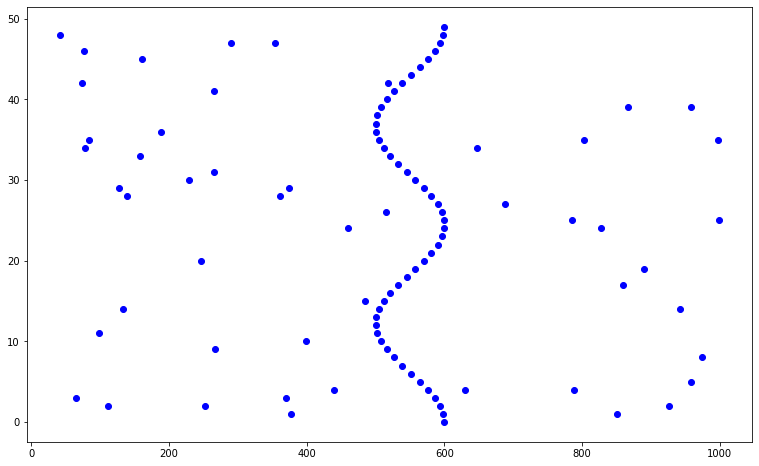

In [8]:
address, timestamp = aer
fig, ax = plt.subplots(figsize = (13, 8))
ax.scatter(timestamp, address, color='blue');

... extract the signal from the noise ...

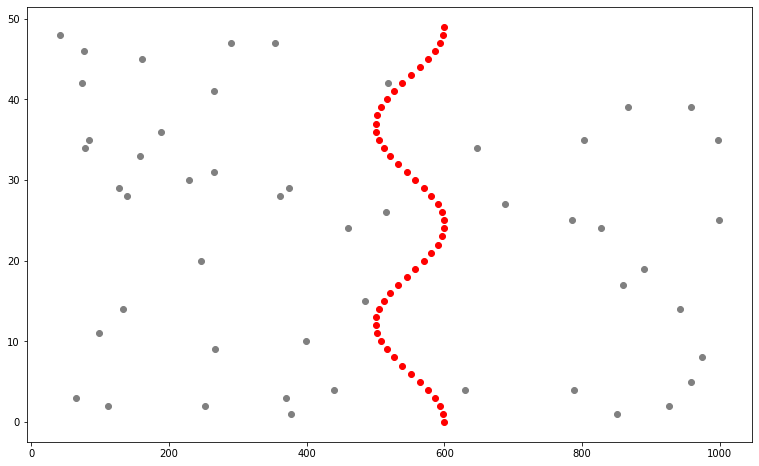

In [9]:
fig, ax = plot_input(aer_noise, aer_pattern)

In [10]:
t_true = aer_pattern[1].min()
t_true

500.0

## a leaky Integrate and fire neurons implemented in an event-based fashion

In [11]:
T = 100 # duration of a stimulus

class SD_neuron(object):
    """
    Synchrony detector neuron
    
    """
    def __init__(self, nb_syn, T=T,  tau=50, weight=.07):
        self.delays = np.random.rand(nb_syn) * T
        self.tau = tau # membrane time constant
        self.weight = weight # integration weight

    def code(self, aer):

        addresses, timestamps = aer

        delayed_timestamps = timestamps + self.delays[addresses]

        #sorted_ind_times = np.argsort(delayed_timestamps)
        sorted_times = np.sort(delayed_timestamps)
        dts = np.diff(np.hstack((0, sorted_times)))
        V = np.zeros_like(dts)
        for i, dt in enumerate(dts):
            if i==0: 
                V[i] = 0
            else:
                if V[i-1]>1: 
                    V[i] = 0.
                else:
                    V[i] = np.exp( - dt / self.tau) * (V[i-1] + self.weight)
        
        #V = self.weight * np.arange(len(addresses)) #* np.exp(-sorted_times/self.tau)
        
        #return delayed_timestamps[sorted_ind_times], V
        return sorted_times, V

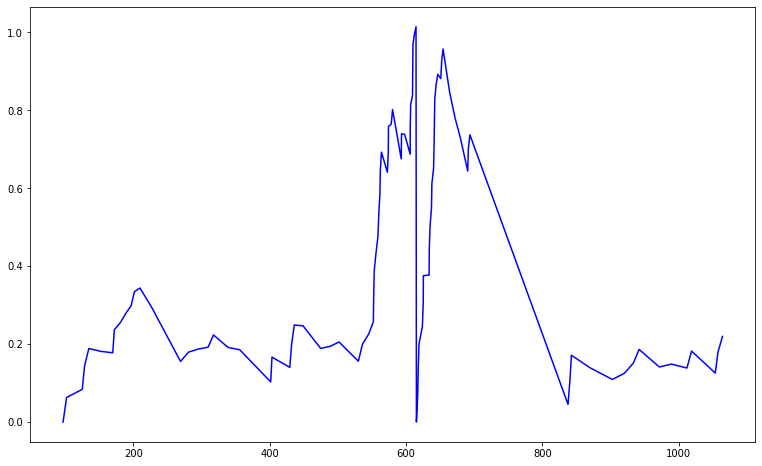

In [12]:
N = SD_neuron(nb_syn)

sorted_times, V = N.code(aer)
fig, ax = plt.subplots(figsize = (13, 8))
ax.plot(sorted_times, V, color='blue');

In [13]:
sorted_times, np.hstack((0, sorted_times)), np.gradient(np.hstack((0, sorted_times)))

(array([  96.82378484,  102.01935815,  125.0617096 ,  128.35898879,
         134.67537419,  152.44221944,  169.77486187,  172.06183386,
         181.11522828,  188.92208283,  196.68226586,  201.53019797,
         209.63055235,  226.42739132,  269.20912276,  280.71003183,
         294.99428845,  309.610306  ,  317.56244194,  338.91632118,
         356.05937506,  401.53002735,  403.38268527,  429.53464829,
         432.19261169,  436.12744163,  448.9055814 ,  474.79554732,
         489.10307507,  501.72125568,  530.12714525,  536.21730973,
         545.23199364,  552.13877304,  552.64758664,  553.40410696,
         556.06207227,  558.89823336,  560.09550794,  561.72877843,
         562.38483811,  564.02115481,  572.69413865,  574.055367  ,
         574.2958903 ,  578.31258279,  580.30743274,  593.0877746 ,
         593.44982783,  598.07692601,  606.17231672,  606.23911405,
         606.93355259,  609.5946239 ,  609.92169813,  610.17802982,
         612.31234909,  614.72405343,  615.30539

In [14]:
sorted_times.shape, np.hstack((0, sorted_times)).shape, np.gradient(np.hstack((0, sorted_times)))[:-1].shape, np.diff(np.hstack((0, sorted_times))).shape

((100,), (101,), (100,), (100,))

In [15]:
sorted_times[-1], sorted_times[-2], sorted_times[-1] - sorted_times[-2]

(1064.423210337477, 1057.8880952603, 6.5351150771771245)

In [16]:
V

array([0.        , 0.06309136, 0.08394726, 0.14412262, 0.18871183,
       0.18134076, 0.17771067, 0.23663574, 0.25585033, 0.27874603,
       0.29861057, 0.33454857, 0.34404234, 0.29590293, 0.15551364,
       0.17917491, 0.18725474, 0.19204822, 0.22351663, 0.19149404,
       0.18559195, 0.10294235, 0.16665156, 0.14026726, 0.19938151,
       0.2489948 , 0.24705525, 0.18891114, 0.19448098, 0.20549172,
       0.15609109, 0.20016353, 0.22559329, 0.25745602, 0.32414063,
       0.38822201, 0.43449938, 0.47667903, 0.53374402, 0.5843411 ,
       0.64581145, 0.69276474, 0.64129526, 0.69219177, 0.75853408,
       0.76457806, 0.80193638, 0.67526798, 0.73989094, 0.73830545,
       0.68747964, 0.75646836, 0.81506907, 0.83919598, 0.9032679 ,
       0.96829108, 0.99490282, 1.01475729, 0.        , 0.06742508,
       0.13532968, 0.20057411, 0.24501731, 0.30730371, 0.37571243,
       0.37707005, 0.44434534, 0.50274939, 0.54944392, 0.61196747,
       0.64969835, 0.70836874, 0.77083055, 0.83114204, 0.86664

In [17]:
V>1.

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [18]:
np.argmax(V>1)

57

In [19]:
t_out = sorted_times[np.argmax(V>1)]
t_out

614.7240534260304

## Supervised STDP learning rule

0 0 0


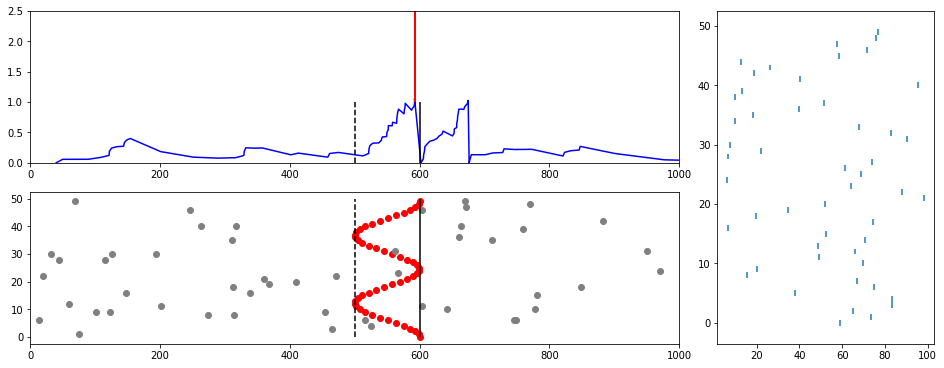

15 0 1


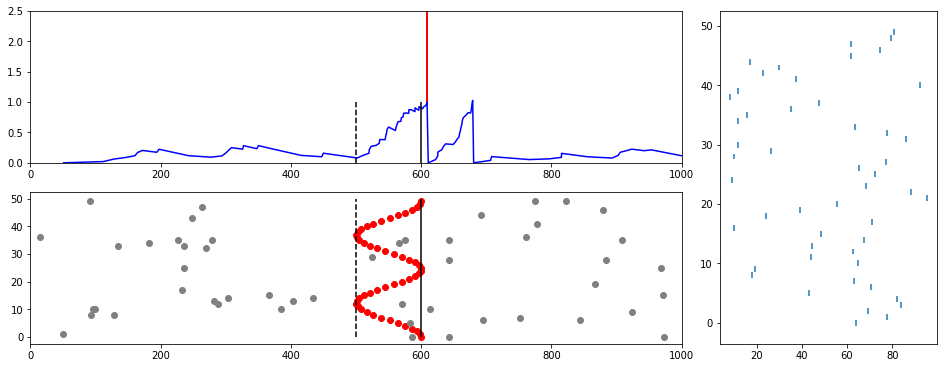

30 0 2


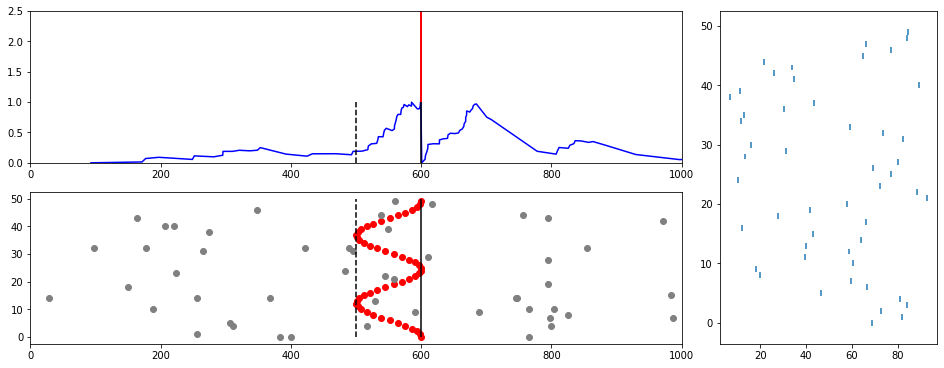

45 0 3


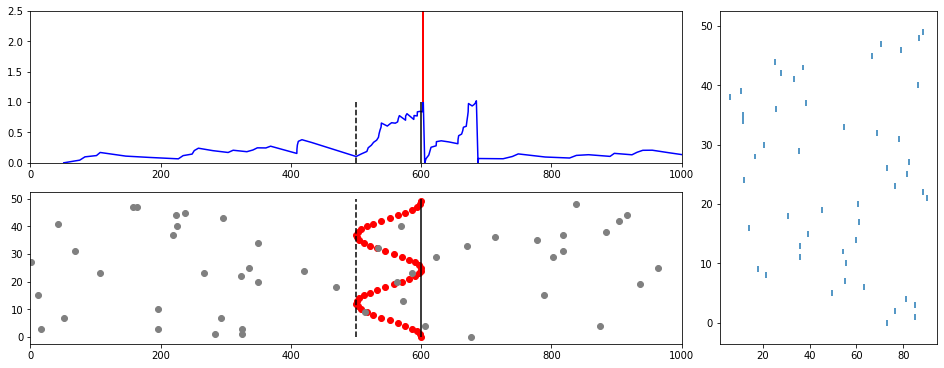

60 0 4


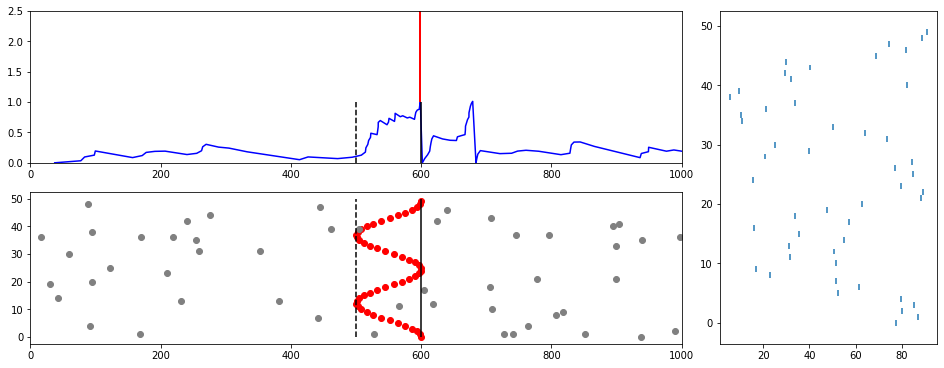

75 0 5


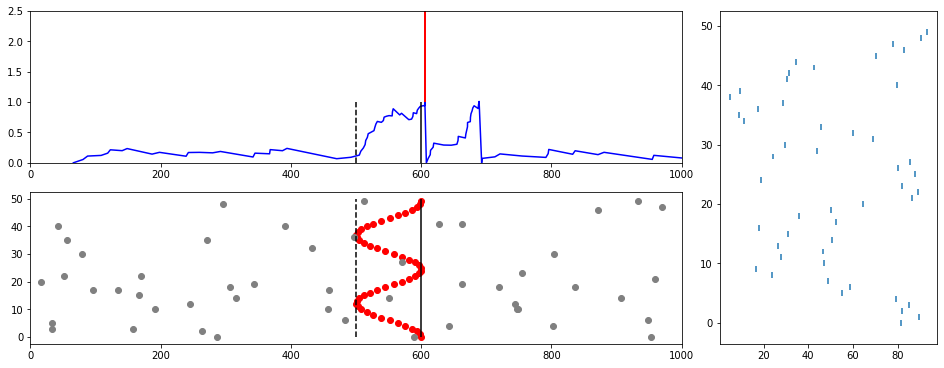

90 0 6


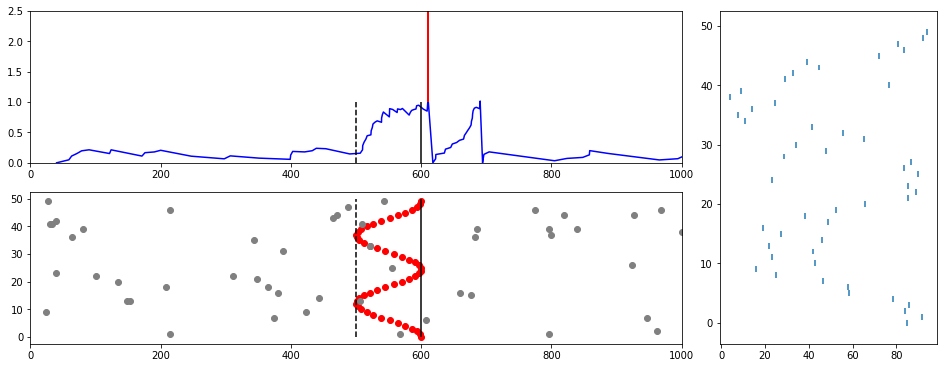

105 0 7


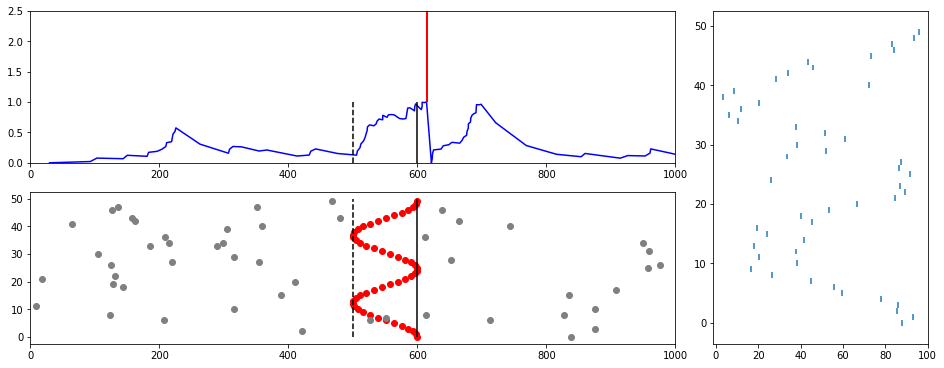

120 0 8


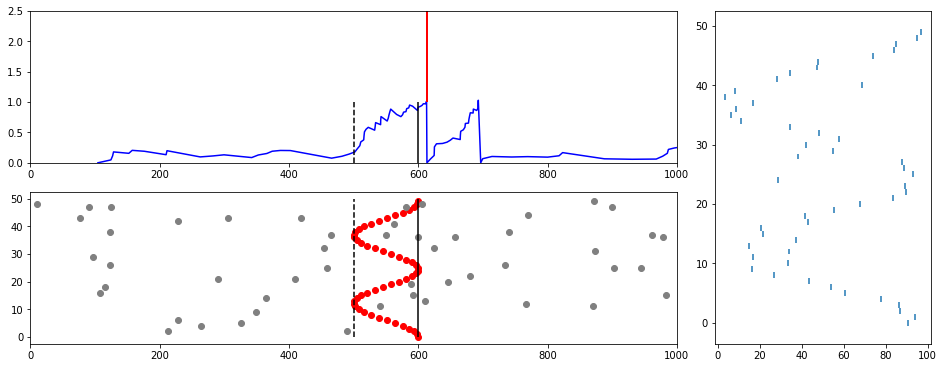

135 0 9


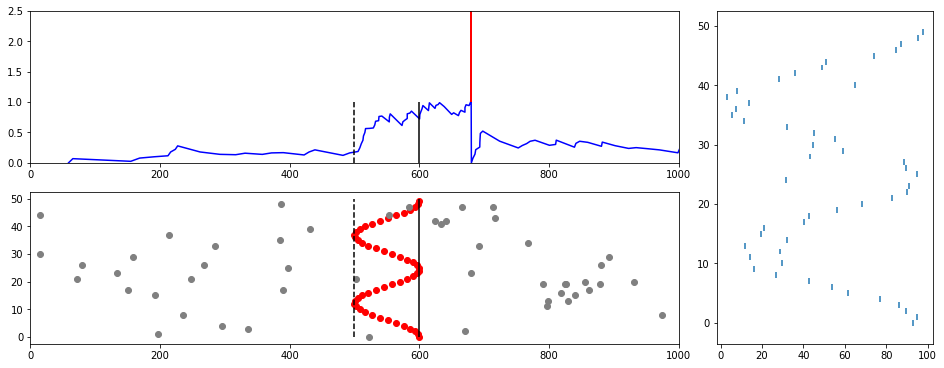

150 0 10


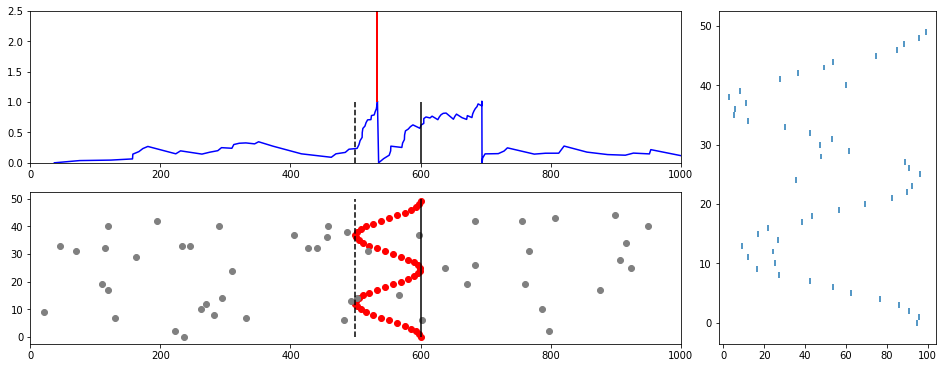

In [25]:
N = SD_neuron(nb_syn)

Dweight0 = 1e-1
Ddelay0 = 1.
N_epochs = 151

for i_epoch in range(N_epochs):
    t_true = 500 #int(np.random.rand()*(simtime-T))
    aer_noise, aer_pattern, aer = make_input(nb_syn, noise_density, simtime, T, t_true)
    sorted_times, V = N.code(aer)

    # STDP rule on the weights
    if V.max() < 1: # does not spike : the weight is too low
        Dweight = Dweight0
    else:
        t_out = sorted_times[np.argmax(V>1)] # output spike
        time_error = (t_true+T) - t_out # negative = too early, positive = too late
        Dweight = Dweight0 * np.tanh( - time_error / N.tau )

        # STDP rule on the delays, event by event
        addresses, timestamps = aer
        for i_address, (address, timestamp) in enumerate(zip(addresses, timestamps)):
            # predicted time by neuron:
            pred_time = t_true +  N.delays[address] # T - 
            # timestamp is that of the i_address-th event - it is fired on synapse address
            delay_pred_error = pred_time - timestamp
            # STDP rule
            #Ddelay = Ddelay0 * np.sign(delay_pred_error) * np.exp( - np.abs(delay_pred_error) / N.tau )
            Ddelay = Ddelay0 * np.exp( - np.abs(delay_pred_error) / N.tau ) * np.tanh( - delay_pred_error / N.tau )
            
            # clip delays
            delay = N.delays[address]
            delay += Ddelay
            delay= np.min((delay, T))
            delay = np.max((delay, 0))
            N.delays[address] = delay

    N.weight *= 1 + Dweight
    #print(N.weight)
    
    if i_epoch % (N_epochs//10) == 0:
        print(i_epoch, i_epoch % (N_epochs//10), i_epoch // (N_epochs//10))
        fig = plt.figure(constrained_layout=True, figsize = (13, 5))
        axs = fig.subplot_mosaic(
        """
        AAAC
        BBBC
        """
        )
        
        axs['A'].plot(sorted_times, V, color='blue')
        axs['A'].vlines([t_true], 0, 1, linestyles='--', color='black')
        axs['A'].vlines([t_true+T], 0, 1, color='black')
        if V.max() > 1: axs['A'].vlines([t_out], 1, 2.5, color='red', lw=2) # spike
        axs['A'].set_xlim(0, simtime)
        axs['A'].set_ylim(0, 2.5)
        adress_noise, time_noise = aer_noise
        adress_pattern, time_pattern = aer_pattern
        axs['B'].vlines([t_true], 0, nb_syn, linestyles='--', color='black')
        axs['B'].vlines([t_true+T], 0, nb_syn, color='black')
        axs['B'].scatter(time_pattern, adress_pattern, color='red');
        axs['B'].scatter(time_noise, adress_noise, color='grey')
        axs['B'].set_xlim(0, simtime)

        axs['C'].eventplot(N.delays[:,np.newaxis]);
        plt.show()